### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore', category=FutureWarning)

### Loading the dataset

In [4]:
file_path = 'air-quality-india.csv'
air_quality_data = pd.read_csv(file_path)

In [5]:
air_quality_data

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


## 1. Data cleaning

### a. Ensuring correct formatting of date and time

In [7]:
air_quality_data['Timestamp'] = pd.to_datetime(air_quality_data['Timestamp'])

In [8]:
air_quality_data

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


### b. Checking for missing values

In [10]:
missing_values = air_quality_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64


### c. Checking for duplicate values

In [12]:
duplicate_rows = air_quality_data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)


Number of Duplicate Rows: 0


In [13]:
print("\nDataset Information:")
print(air_quality_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  36192 non-null  datetime64[ns]
 1   Year       36192 non-null  int64         
 2   Month      36192 non-null  int64         
 3   Day        36192 non-null  int64         
 4   Hour       36192 non-null  int64         
 5   PM2.5      36192 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.7 MB
None


## 2. EDA (Exploratory Data Analysis)

### a. PM2.5 trends over time

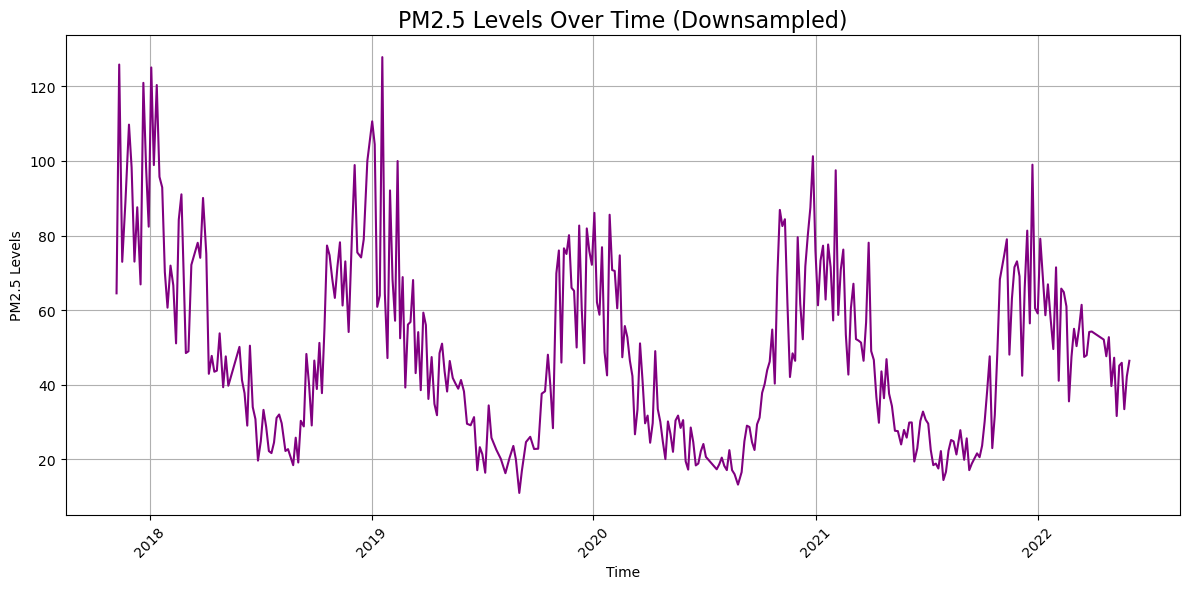

In [15]:
downsampled_data = air_quality_data[::100]
plt.figure(figsize=(12, 6))
plt.plot(downsampled_data['Timestamp'], downsampled_data['PM2.5'], color='purple')
plt.title('PM2.5 Levels Over Time (Downsampled)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('PM2.5 Levels')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### b. PM2.5 Trends by Year, Month, Day, Hour

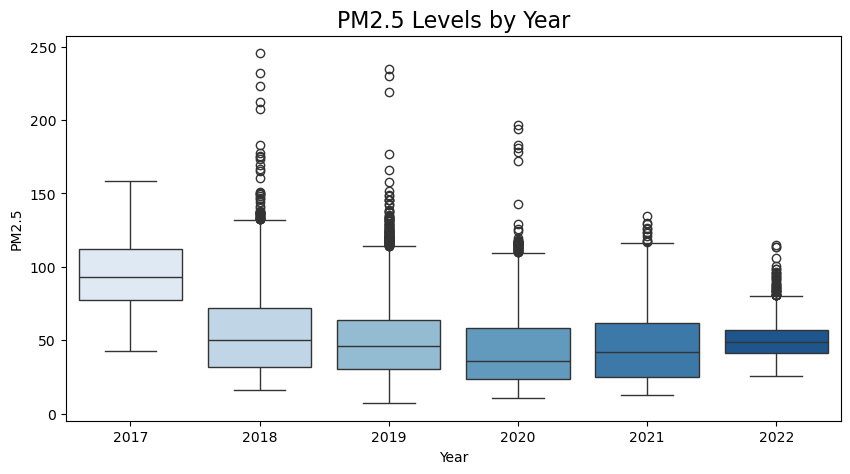

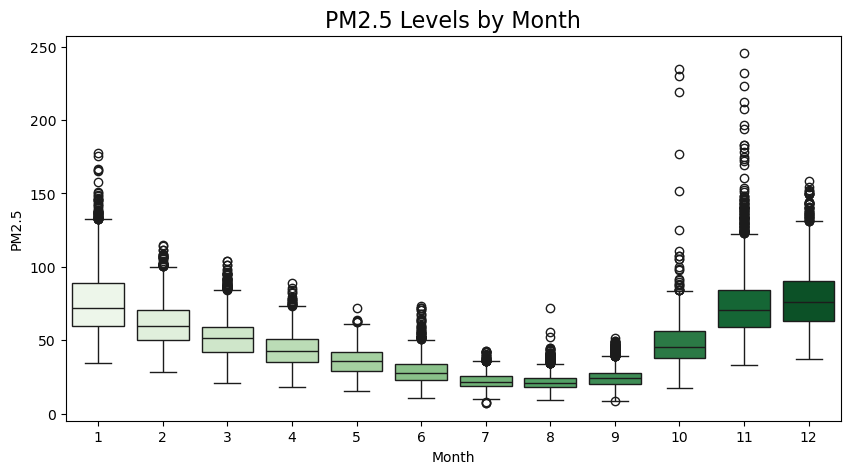

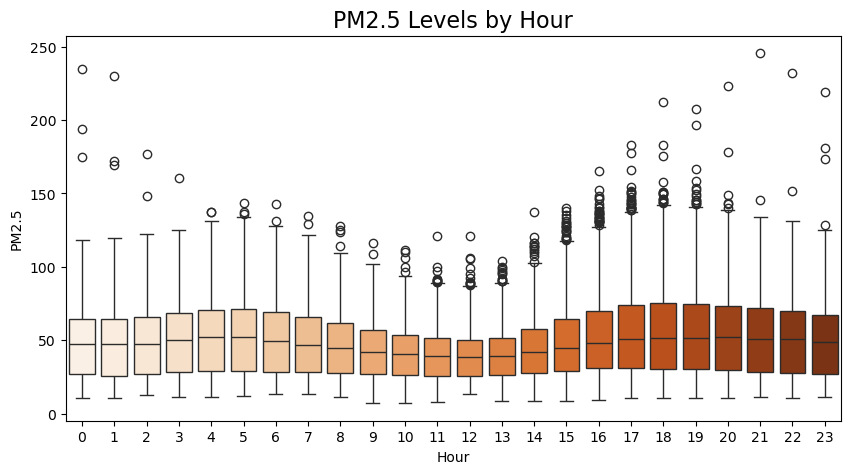

In [17]:
air_quality_data['Year'] = air_quality_data['Timestamp'].dt.year
air_quality_data['Month'] = air_quality_data['Timestamp'].dt.month
air_quality_data['Day'] = air_quality_data['Timestamp'].dt.day
air_quality_data['Hour'] = air_quality_data['Timestamp'].dt.hour

plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='PM2.5', data=air_quality_data, palette='Blues')
plt.title('PM2.5 Levels by Year', fontsize=16)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='PM2.5', data=air_quality_data, palette='Greens', )
plt.title('PM2.5 Levels by Month', fontsize=16)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Hour', y='PM2.5', data=air_quality_data, palette='Oranges')
plt.title('PM2.5 Levels by Hour', fontsize=16)
plt.show()

### c. Distribution of PM2.5 Levels

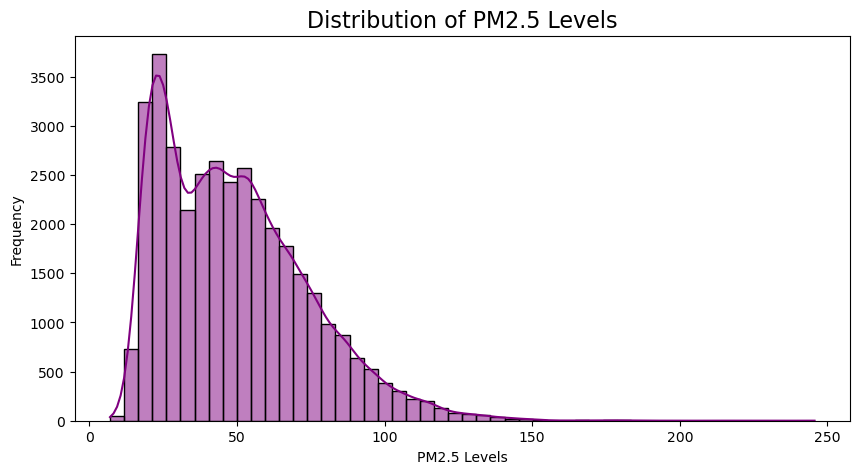

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(air_quality_data['PM2.5'], bins=50, kde=True, color='purple')
plt.title('Distribution of PM2.5 Levels', fontsize=16)
plt.xlabel('PM2.5 Levels')
plt.ylabel('Frequency')
plt.show()

## 3. Feature engineering

### a. Time-based features
- day of the week
- season
- lag features

In [21]:
air_quality_data['DayOfWeek'] = air_quality_data['Timestamp'].dt.dayofweek  # 0 = Monday, ..., 6 = Sunday

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

air_quality_data['Season'] = air_quality_data['Month'].apply(get_season)
air_quality_data[['Timestamp', 'DayOfWeek', 'Season']].head()


,Timestamp,DayOfWeek,Season
0,2017-11-07 12:00:00,1,Fall
1,2017-11-07 13:00:00,1,Fall
2,2017-11-07 14:00:00,1,Fall
3,2017-11-07 15:00:00,1,Fall
4,2017-11-07 16:00:00,1,Fall


In [22]:
air_quality_data

,Timestamp,Year,Month,Day,Hour,PM2.5,DayOfWeek,Season
0,2017-11-07 12:00:00,2017,11,7,12,64.51,1,Fall
1,2017-11-07 13:00:00,2017,11,7,13,69.95,1,Fall
2,2017-11-07 14:00:00,2017,11,7,14,92.79,1,Fall
3,2017-11-07 15:00:00,2017,11,7,15,109.66,1,Fall
4,2017-11-07 16:00:00,2017,11,7,16,116.50,1,Fall
...,...,...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89,5,Summer
36188,2022-06-04 12:00:00,2022,6,4,12,33.83,5,Summer
36189,2022-06-04 13:00:00,2022,6,4,13,33.05,5,Summer
36190,2022-06-04 14:00:00,2022,6,4,14,35.29,5,Summer


In [23]:
air_quality_data.to_csv('air_quality_india_v2.csv', mode="w+")

### b. Lag features

In [25]:
air_quality_data['PM2.5_Lag_1'] = air_quality_data['PM2.5'].shift(1)  # PM2.5 1 hour before
air_quality_data['PM2.5_Lag_6'] = air_quality_data['PM2.5'].shift(6)  # PM2.5 6 hours before
air_quality_data['PM2.5_Lag_24'] = air_quality_data['PM2.5'].shift(24)  # PM2.5 24 hours before

air_quality_data = air_quality_data.dropna()

air_quality_data[['PM2.5', 'PM2.5_Lag_1', 'PM2.5_Lag_6', 'PM2.5_Lag_24']].head()

,PM2.5,PM2.5_Lag_1,PM2.5_Lag_6,PM2.5_Lag_24
24,88.05,84.32,112.20,64.51
25,116.13,88.05,114.65,69.95
26,127.02,116.13,107.47,92.79
27,133.68,127.02,92.59,109.66
28,139.93,133.68,90.64,116.50


In [26]:
air_quality_data.to_csv('air_quality_india_v3.csv', mode="w")

## 3. Train-test split

In [28]:
air_quality_data['Timestamp'] = pd.to_datetime(air_quality_data['Timestamp'])

air_quality_data['Year'] = air_quality_data['Timestamp'].dt.year
air_quality_data['Month'] = air_quality_data['Timestamp'].dt.month
air_quality_data['Day'] = air_quality_data['Timestamp'].dt.day
air_quality_data['Hour'] = air_quality_data['Timestamp'].dt.hour
air_quality_data['Minute'] = air_quality_data['Timestamp'].dt.minute
air_quality_data['DayOfWeek'] = air_quality_data['Timestamp'].dt.dayofweek

air_quality_data['PM2.5_Lag_1'] = air_quality_data['PM2.5'].shift(1)
air_quality_data['PM2.5_Lag_6'] = air_quality_data['PM2.5'].shift(6)
air_quality_data['PM2.5_Lag_24'] = air_quality_data['PM2.5'].shift(24)

air_quality_data = air_quality_data.dropna()

features = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'PM2.5_Lag_1', 'PM2.5_Lag_6', 'PM2.5_Lag_24']
target = 'PM2.5'

C:\Users\Kartikey Kushwaha\AppData\Local\Temp\ipykernel_18284\1556866914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_data['Timestamp'] = pd.to_datetime(air_quality_data['Timestamp'])
C:\Users\Kartikey Kushwaha\AppData\Local\Temp\ipykernel_18284\1556866914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_data['Year'] = air_quality_data['Timestamp'].dt.year
C:\Users\Kartikey Kushwaha\AppData\Local\Temp\ipykernel_18284\1556866914.py:4: SettingWithCopyWarning: 
A value is tryi

In [29]:
X_train, X_test, y_train, y_test = train_test_split(air_quality_data[features], air_quality_data[target], test_size=0.2, random_state=42)

In [30]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression R²: {r2}")

Linear Regression RMSE: 5.498042052461269
Linear Regression R²: 0.9508127499422689


In [31]:
X_test_with_timestamp = air_quality_data.loc[X_test.index, 'Timestamp']
X_test_with_timestamp = X_test_with_timestamp.sort_values()

y_test_sorted = y_test.loc[X_test_with_timestamp.index]
y_pred_sorted = pd.Series(y_pred, index=X_test.index).loc[X_test_with_timestamp.index]

sampled_indices = X_test_with_timestamp.index[::100]
X_test_sampled = X_test_with_timestamp[sampled_indices]
y_test_sampled = y_test_sorted[sampled_indices]
y_pred_sampled = y_pred_sorted[sampled_indices]

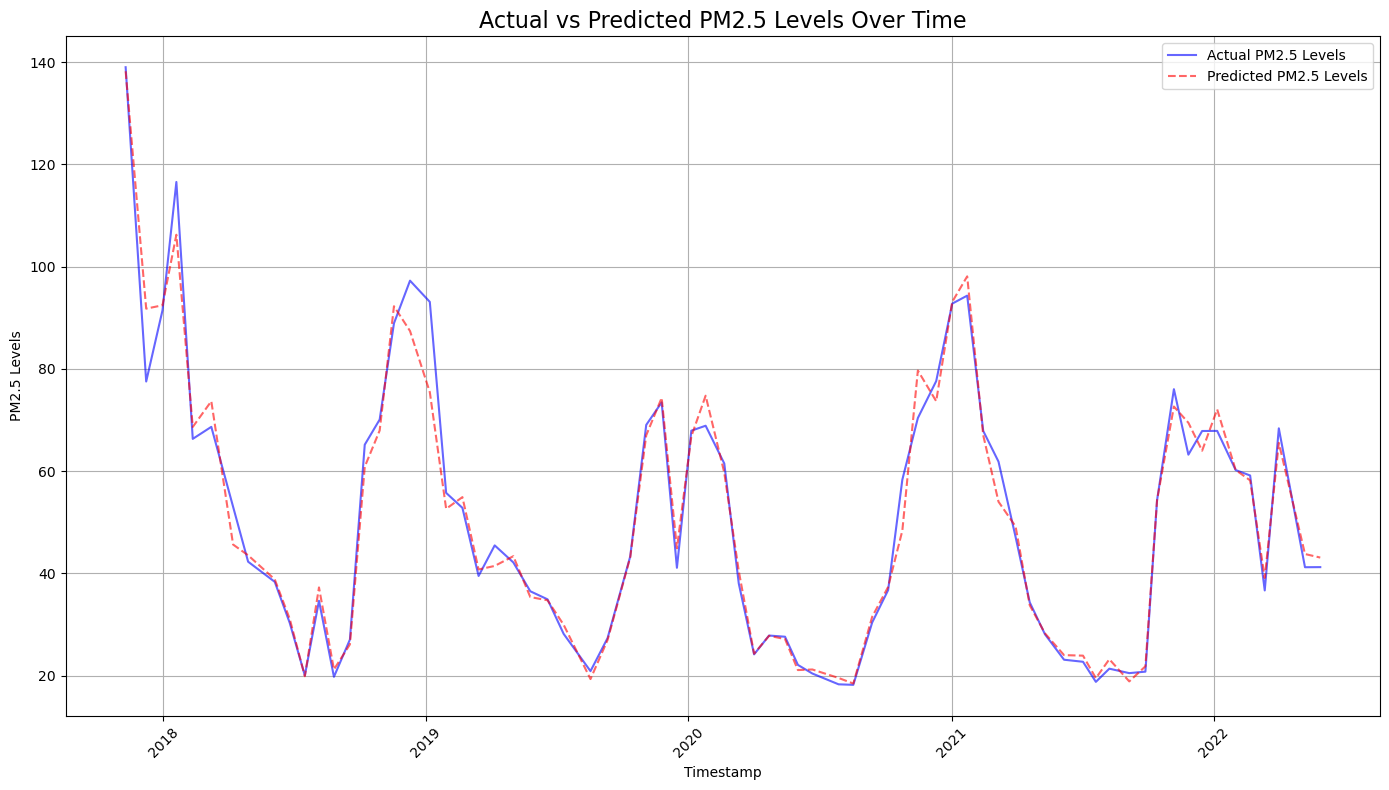

In [32]:
plt.figure(figsize=(14, 8))
plt.plot(X_test_sampled, y_test_sampled, label='Actual PM2.5 Levels', color='blue', alpha=0.6)
plt.plot(X_test_sampled, y_pred_sampled, label='Predicted PM2.5 Levels', color='red', linestyle='--', alpha=0.6)
plt.title('Actual vs Predicted PM2.5 Levels Over Time', fontsize=16)
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Levels')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

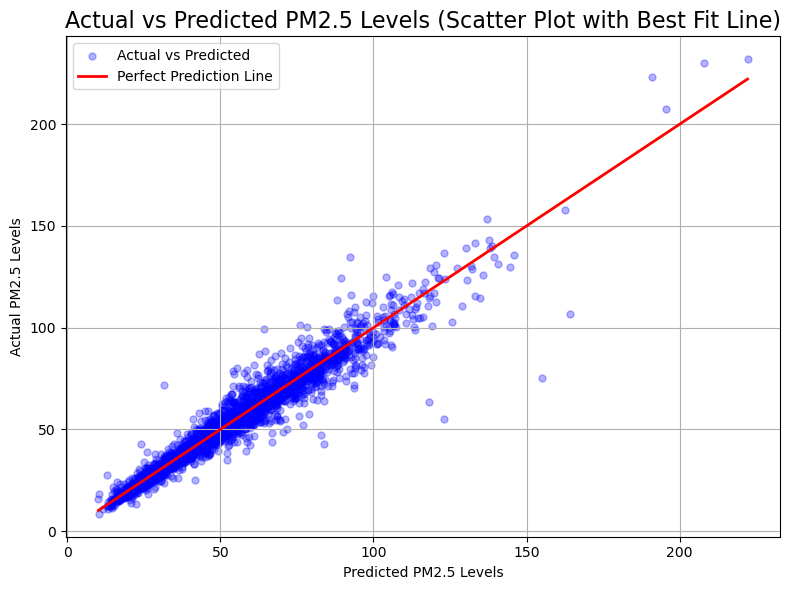

In [33]:
sample_indices = np.random.choice(range(len(y_pred)), size=int(0.5 * len(y_pred)), replace=False)

plt.figure(figsize=(8, 6))

plt.scatter(y_pred[sample_indices], y_test.iloc[sample_indices], color='blue', alpha=0.3, s=25, label='Actual vs Predicted')

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linewidth=2, label='Perfect Prediction Line')

plt.title('Actual vs Predicted PM2.5 Levels (Scatter Plot with Best Fit Line)', fontsize=16)
plt.xlabel('Predicted PM2.5 Levels')
plt.ylabel('Actual PM2.5 Levels')

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.show()

## 4. Logistic Regression

In [35]:
def categorize_air_quality(pm_value):
    if pm_value < 50:
        return 0  # Good
    elif 50 <= pm_value < 100:
        return 1  # Moderate
    elif 100 <= pm_value < 150:
        return 2  # Unhealthy
    else:
        return 3  # Very Unhealthy

air_quality_data['AirQualityCategory'] = air_quality_data['PM2.5'].apply(categorize_air_quality)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

features = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'PM2.5_Lag_1', 'PM2.5_Lag_6', 'PM2.5_Lag_24']
target = 'AirQualityCategory'

X_train, X_test, y_train, y_test = train_test_split(air_quality_data[features], air_quality_data[target], test_size=0.2, random_state=42)

log_reg_model = LogisticRegression(max_iter=5000)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3920  152    0    0]
 [ 179 2696   25    1]
 [   0   66  177    3]
 [   0    1    3    6]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4072
           1       0.92      0.93      0.93      2901
           2       0.86      0.72      0.78       246
           3       0.60      0.60      0.60        10

    accuracy                           0.94      7229
   macro avg       0.84      0.80      0.82      7229
weighted avg       0.94      0.94      0.94      7229



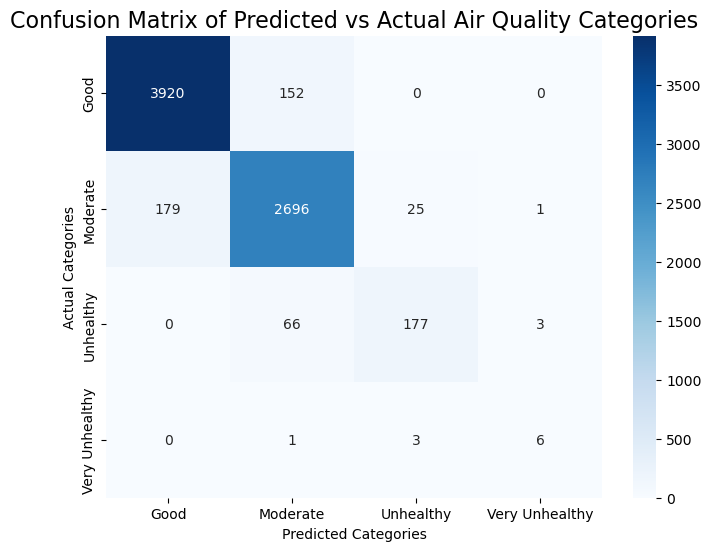

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], yticklabels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'])
plt.title('Confusion Matrix of Predicted vs Actual Air Quality Categories', fontsize=16)
plt.xlabel('Predicted Categories')
plt.ylabel('Actual Categories')
plt.show()